## 1. Salary_Distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("HRDataset_v14.csv")

In [3]:
# remove missing salaries
df = df.dropna(subset=['Salary'])

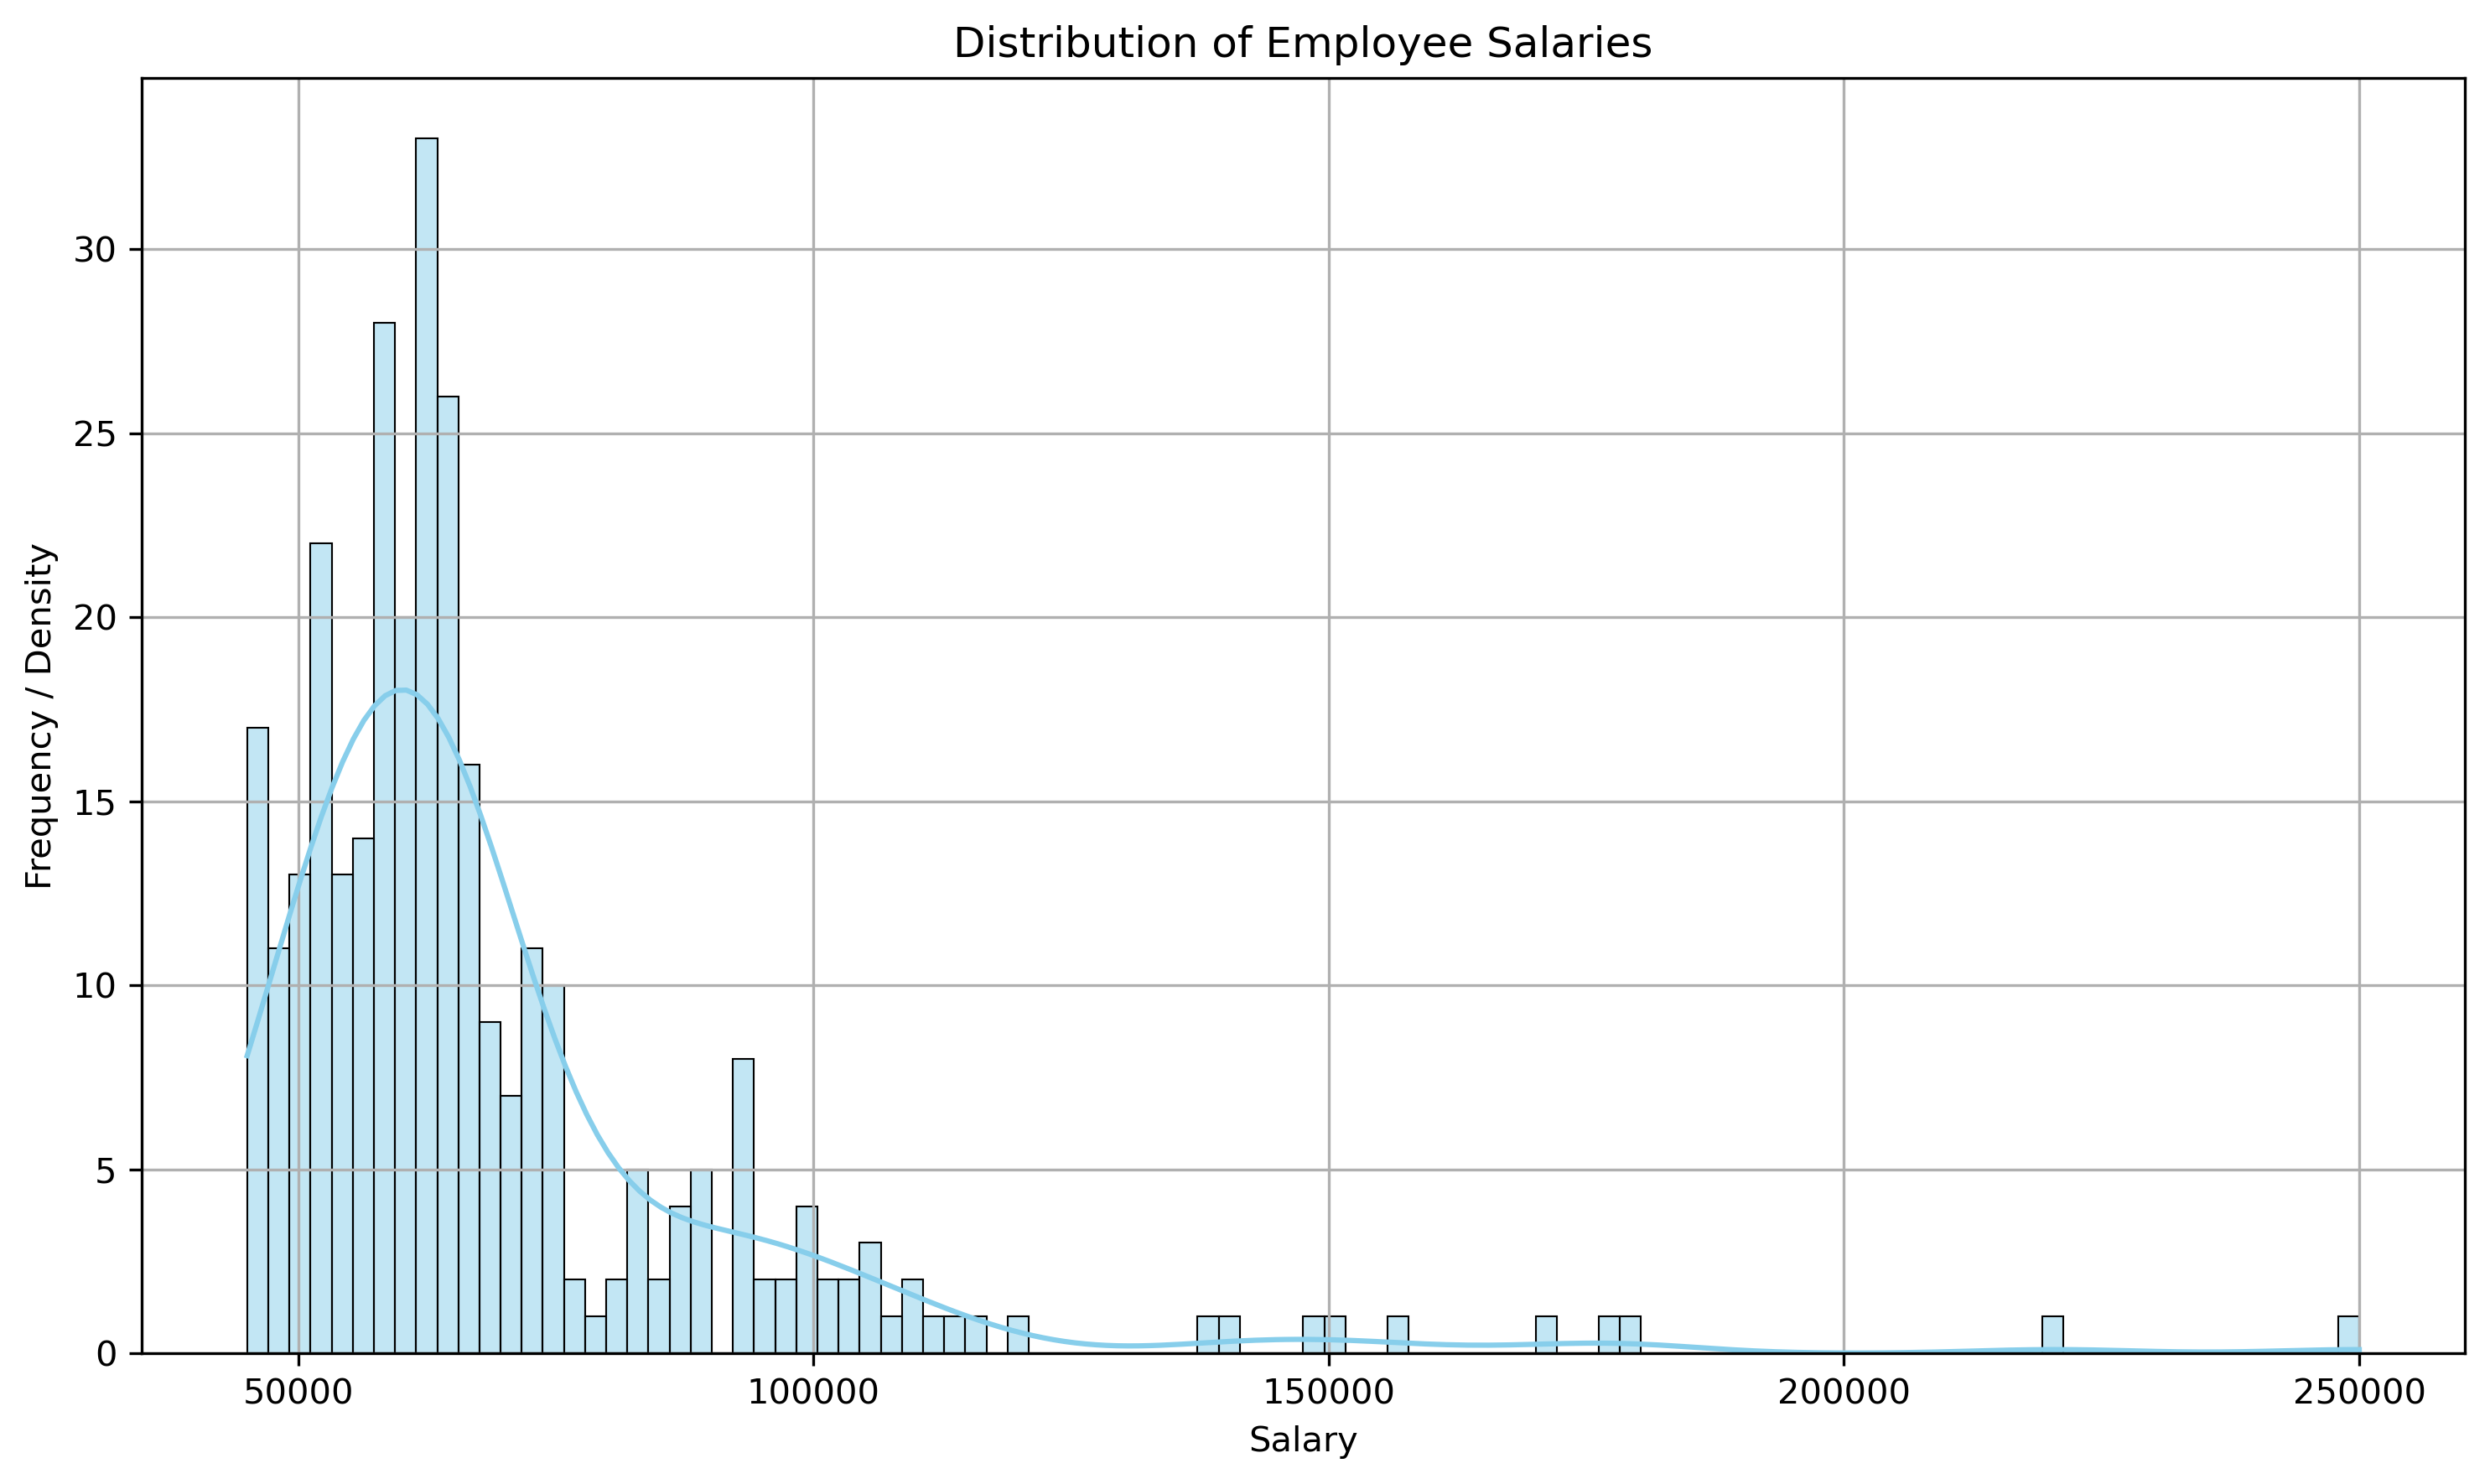

In [58]:
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(df['Salary'], kde=True, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency / Density')
plt.grid(True)
plt.tight_layout()
plt.show()

*The histogram shows how frequently different salary ranges occur. The salary distribution is right-skewed, with most employees earning between 40,000–80,000 and a few outliers earning much higher.*

## 2. Top_Positions_by_Absences

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("HRDataset_v14.csv")

In [16]:
# clean data
df = df.dropna(subset=['Position', 'Absences'])
df['Position'] = df['Position'].str.strip()

In [17]:
# calculate average absences per position
mean_absences = df.groupby('Position')['Absences'].mean().sort_values(ascending=False).reset_index()

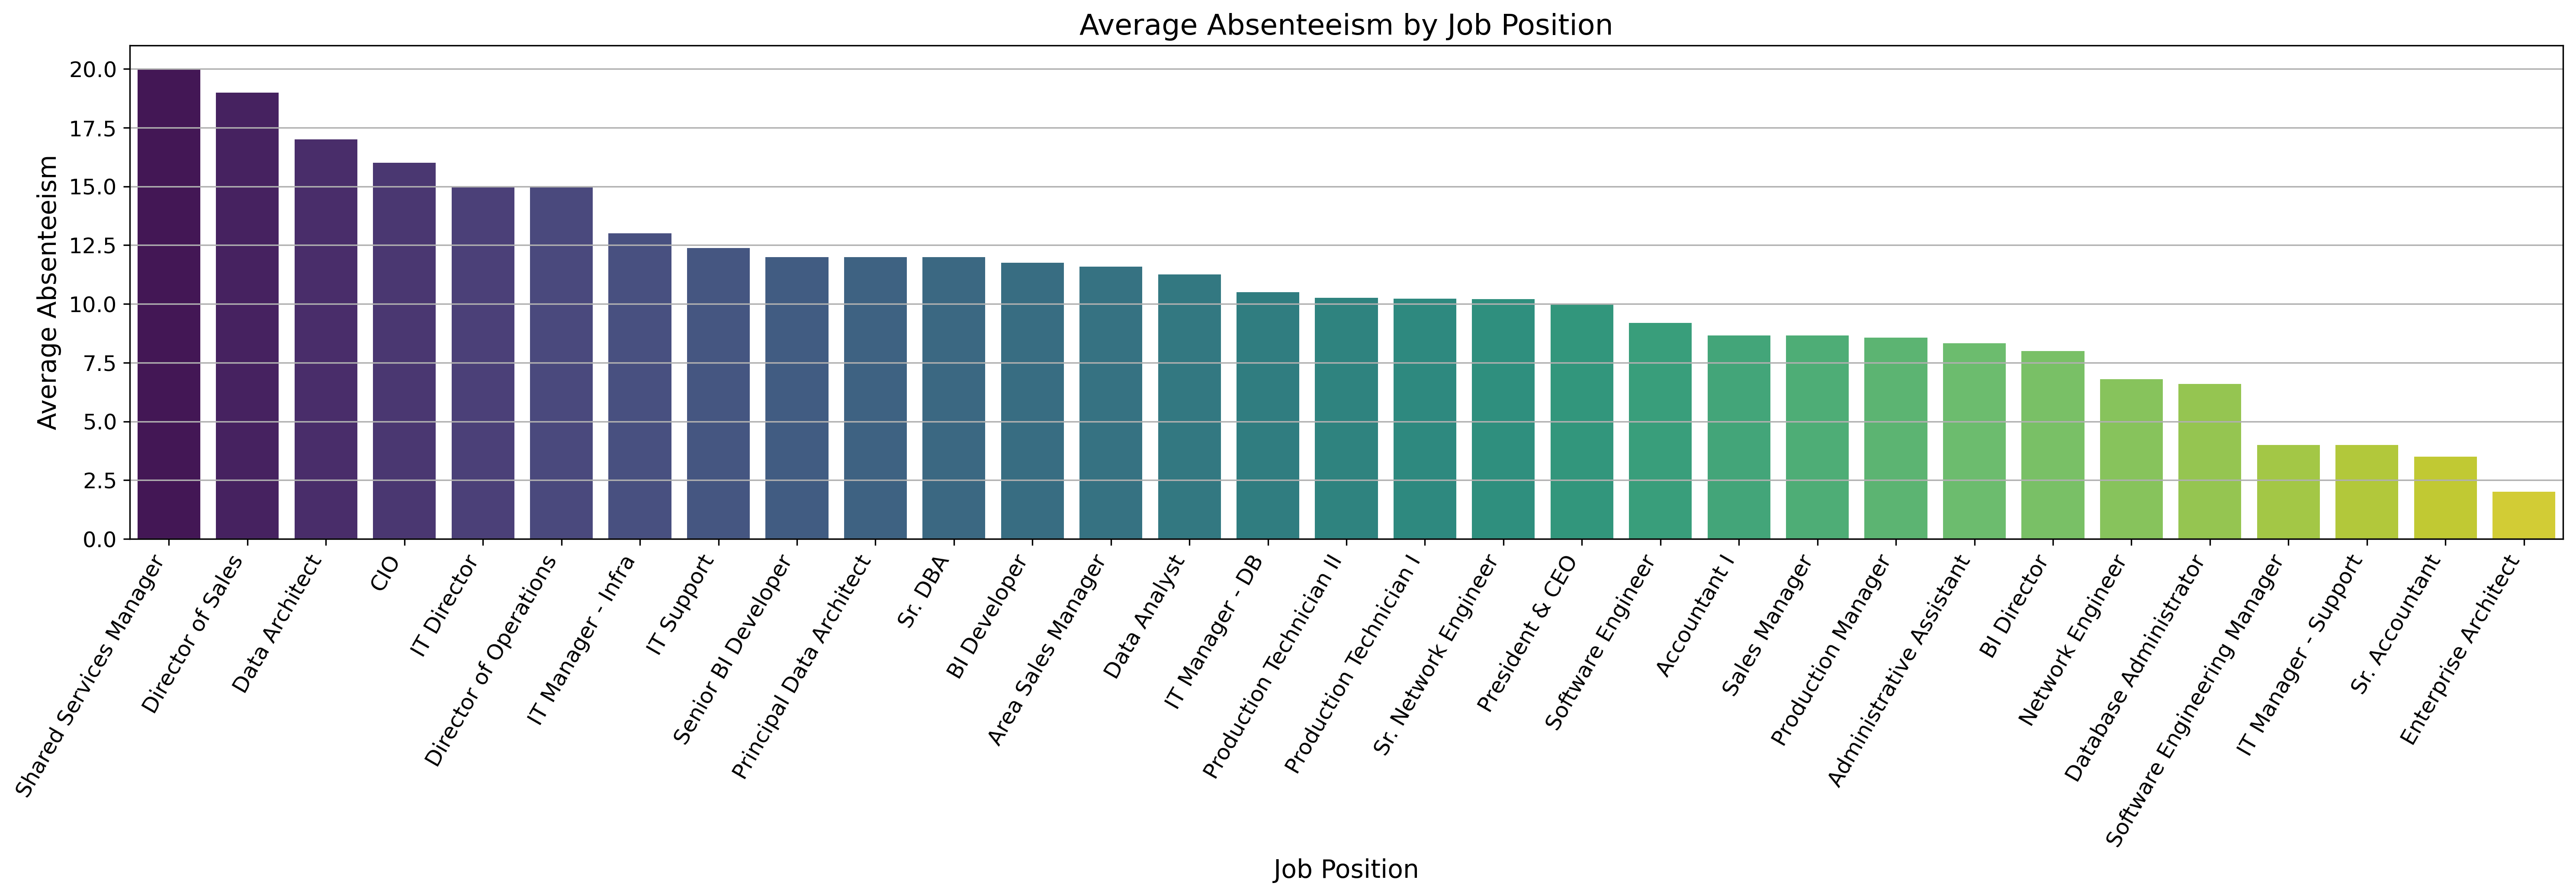

In [42]:
plt.figure(figsize=(20, 7), dpi=300)
sns.barplot(data=mean_absences, x='Position', y='Absences', hue='Position', palette='viridis', dodge=False, legend=False)
plt.title('Average Absenteeism by Job Position', fontsize=16)
plt.xlabel('Job Position', fontsize=14)
plt.ylabel('Average Absenteeism', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

*By calculating the average number of absences per job position and visualizing the results with a bar chart, this analysis identifies which roles have the highest absenteeism.The bar chart shows that Shared Service Manager, Directors of sales, and Data Architects have the highest average absenteeism, while Data Analysts and Enterprise Architects have the lowest.*

## 3. Job_Satisfaction

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("HRDataset_v14.csv")

In [39]:
# classify employees by termination status
df['Status'] = df['DateofTermination'].apply(lambda x: 'Terminated' if pd.notnull(x) else 'Employed')

In [40]:
# remove missing satisfaction values
df = df.dropna(subset=['EmpSatisfaction'])

# remove outliers in satisfaction
Q1 = df['EmpSatisfaction'].quantile(0.25)
Q3 = df['EmpSatisfaction'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['EmpSatisfaction'] >= Q1 - 1.5 * IQR) & (df['EmpSatisfaction'] <= Q3 + 1.5 * IQR)]

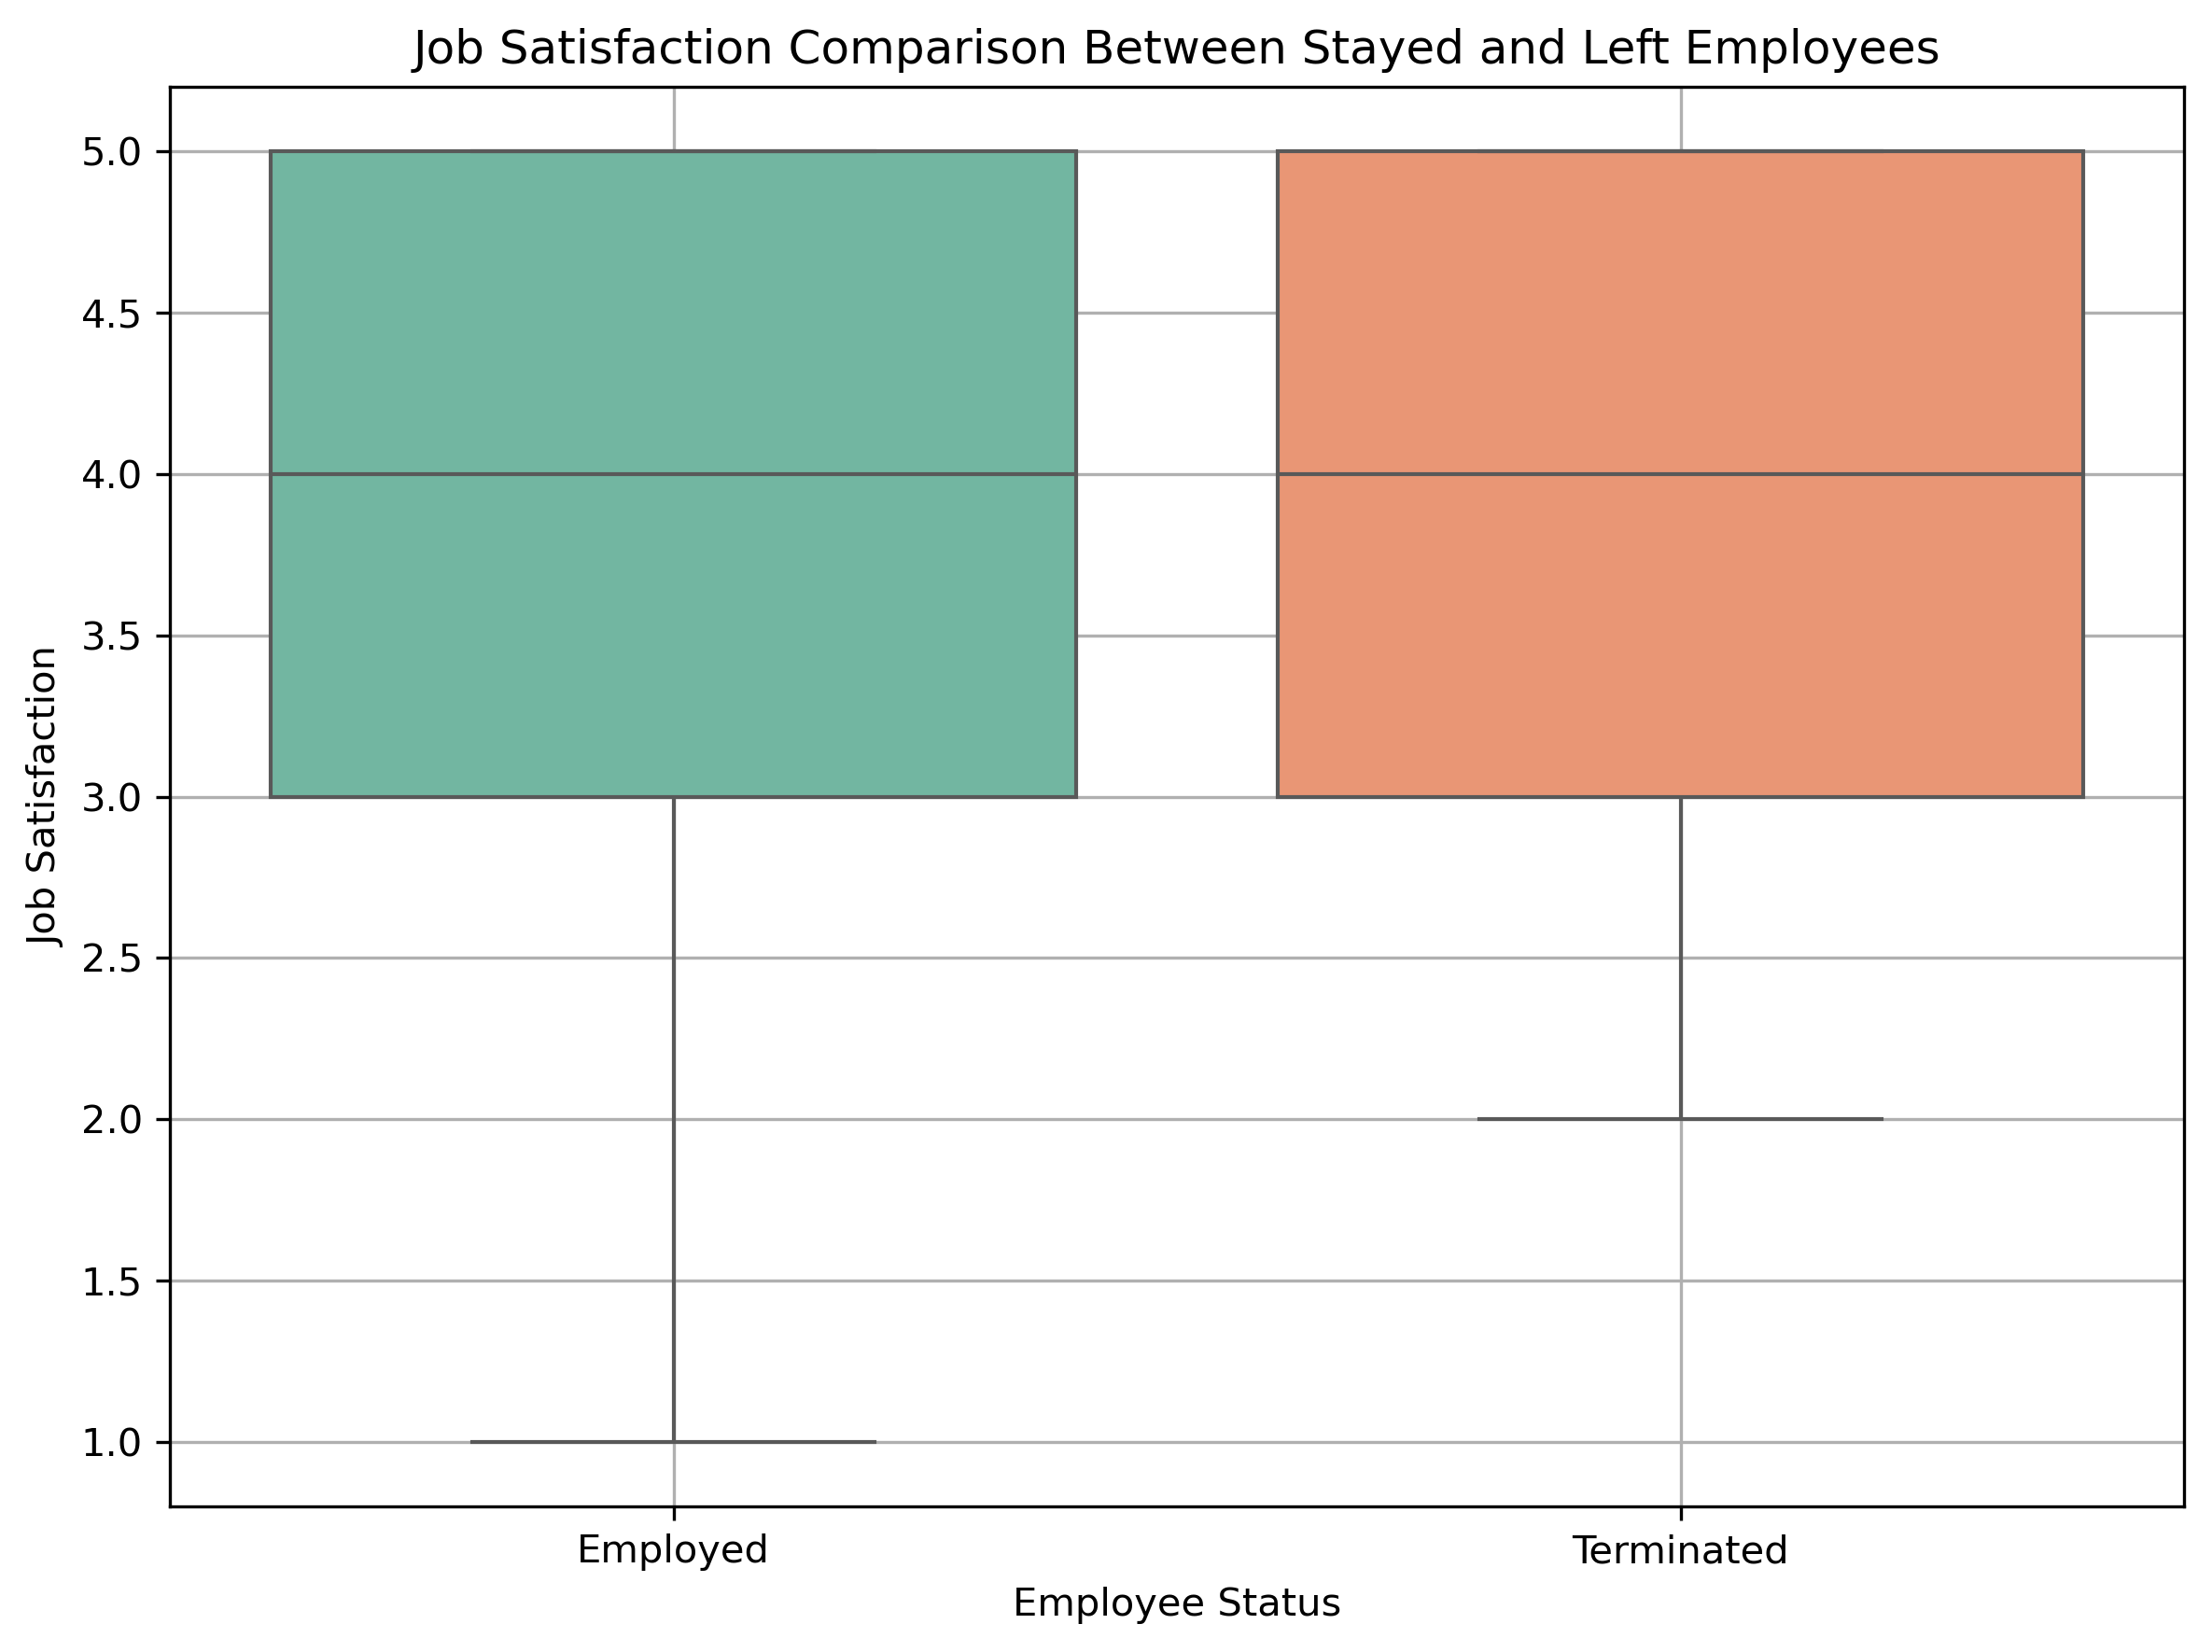

In [41]:
plt.figure(figsize=(8, 6), dpi=300)
sns.boxplot(x='Status', y='EmpSatisfaction', hue='Status', data=df, palette='Set2', legend=False)
plt.title('Job Satisfaction Comparison Between Stayed and Left Employees')
plt.xlabel('Employee Status')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

*This comparison uses a boxplot to examine differences in job satisfaction between employees who are still with the company and those who have left (based on the presence of a termination date). It is showing that while both have a similar median satisfaction around 4, the Employed group has a wider range, including individuals with very low satisfaction (as low as 1). In contrast, the Terminated group shows a narrower range, starting at a higher minimum (around 2), suggesting that extremely dissatisfied individuals are more likely to remain employed rather than leave immediately.*

## 4. Annual_Hiring_Trend

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("HRDataset_v14.csv")

In [49]:
# convert string to datetime using multiple formats
def parse_date(date_str):
    for fmt in ("%Y-%m-%d", "%d-%m-%Y", "%m/%d/%Y", "%d/%m/%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except:
            continue
    return pd.NaT

In [50]:
# datetime conversion
df['DateofHire'] = df['DateofHire'].apply(parse_date)

df = df[df['DateofHire'].notna()]

In [51]:
# count hires per year
hire_trend = df['DateofHire'].dt.year.value_counts().sort_index()

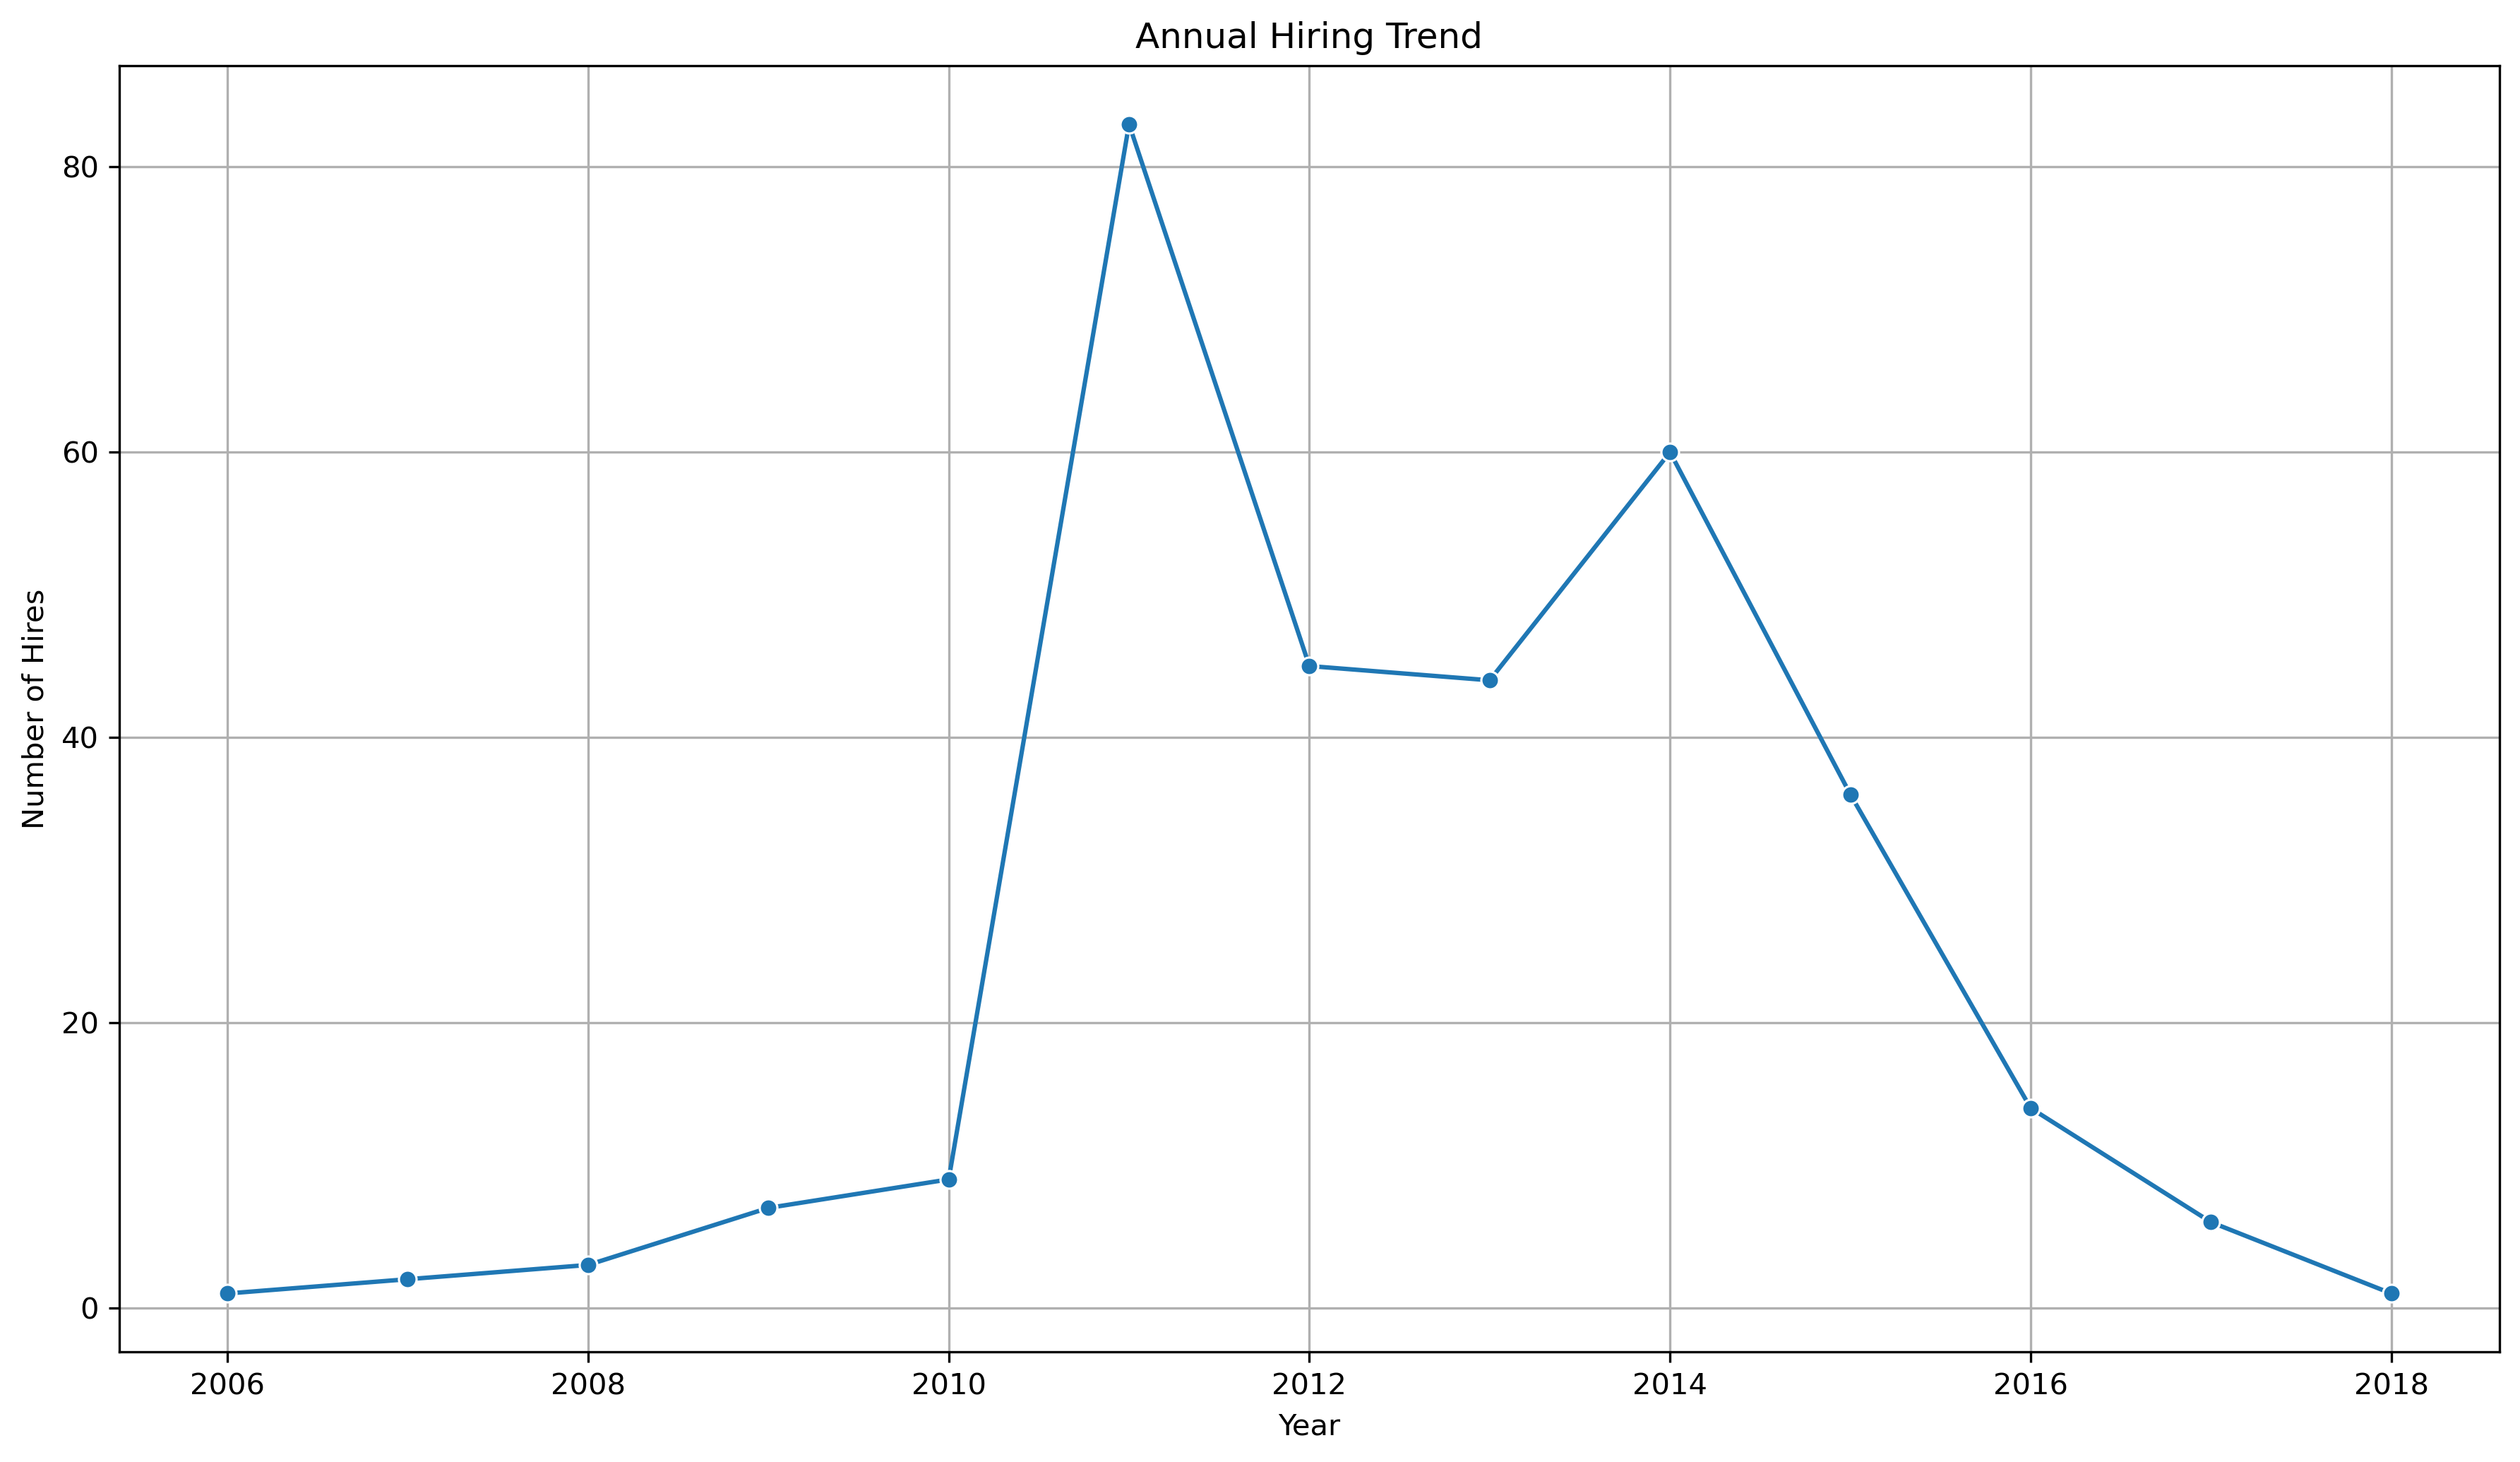

In [52]:
plt.figure(figsize=(12, 7), dpi=300)
sns.lineplot(x=hire_trend.index, y=hire_trend.values, marker='o')
plt.title('Annual Hiring Trend')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.grid(True)
plt.tight_layout()
plt.show()

*By extracting the year from each employee’s hiring date and counting hires per year, this analysis reveals trends in recruitment activity over time. According to the plot, hiring was lowest in 2006, followed by a slow increase until 2010. A significant spike occurred in 2011, with hiring more than doubling compared to 2010, marking the peak. Another upward trend appeared in 2014, but after that, hiring steadily declined, reaching its lowest point again by 2018.*

## 5. Projects_vs_Absences

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("HRDataset_v14.csv")

In [55]:
# remove missing values
df = df.dropna(subset=['SpecialProjectsCount', 'Absences'])

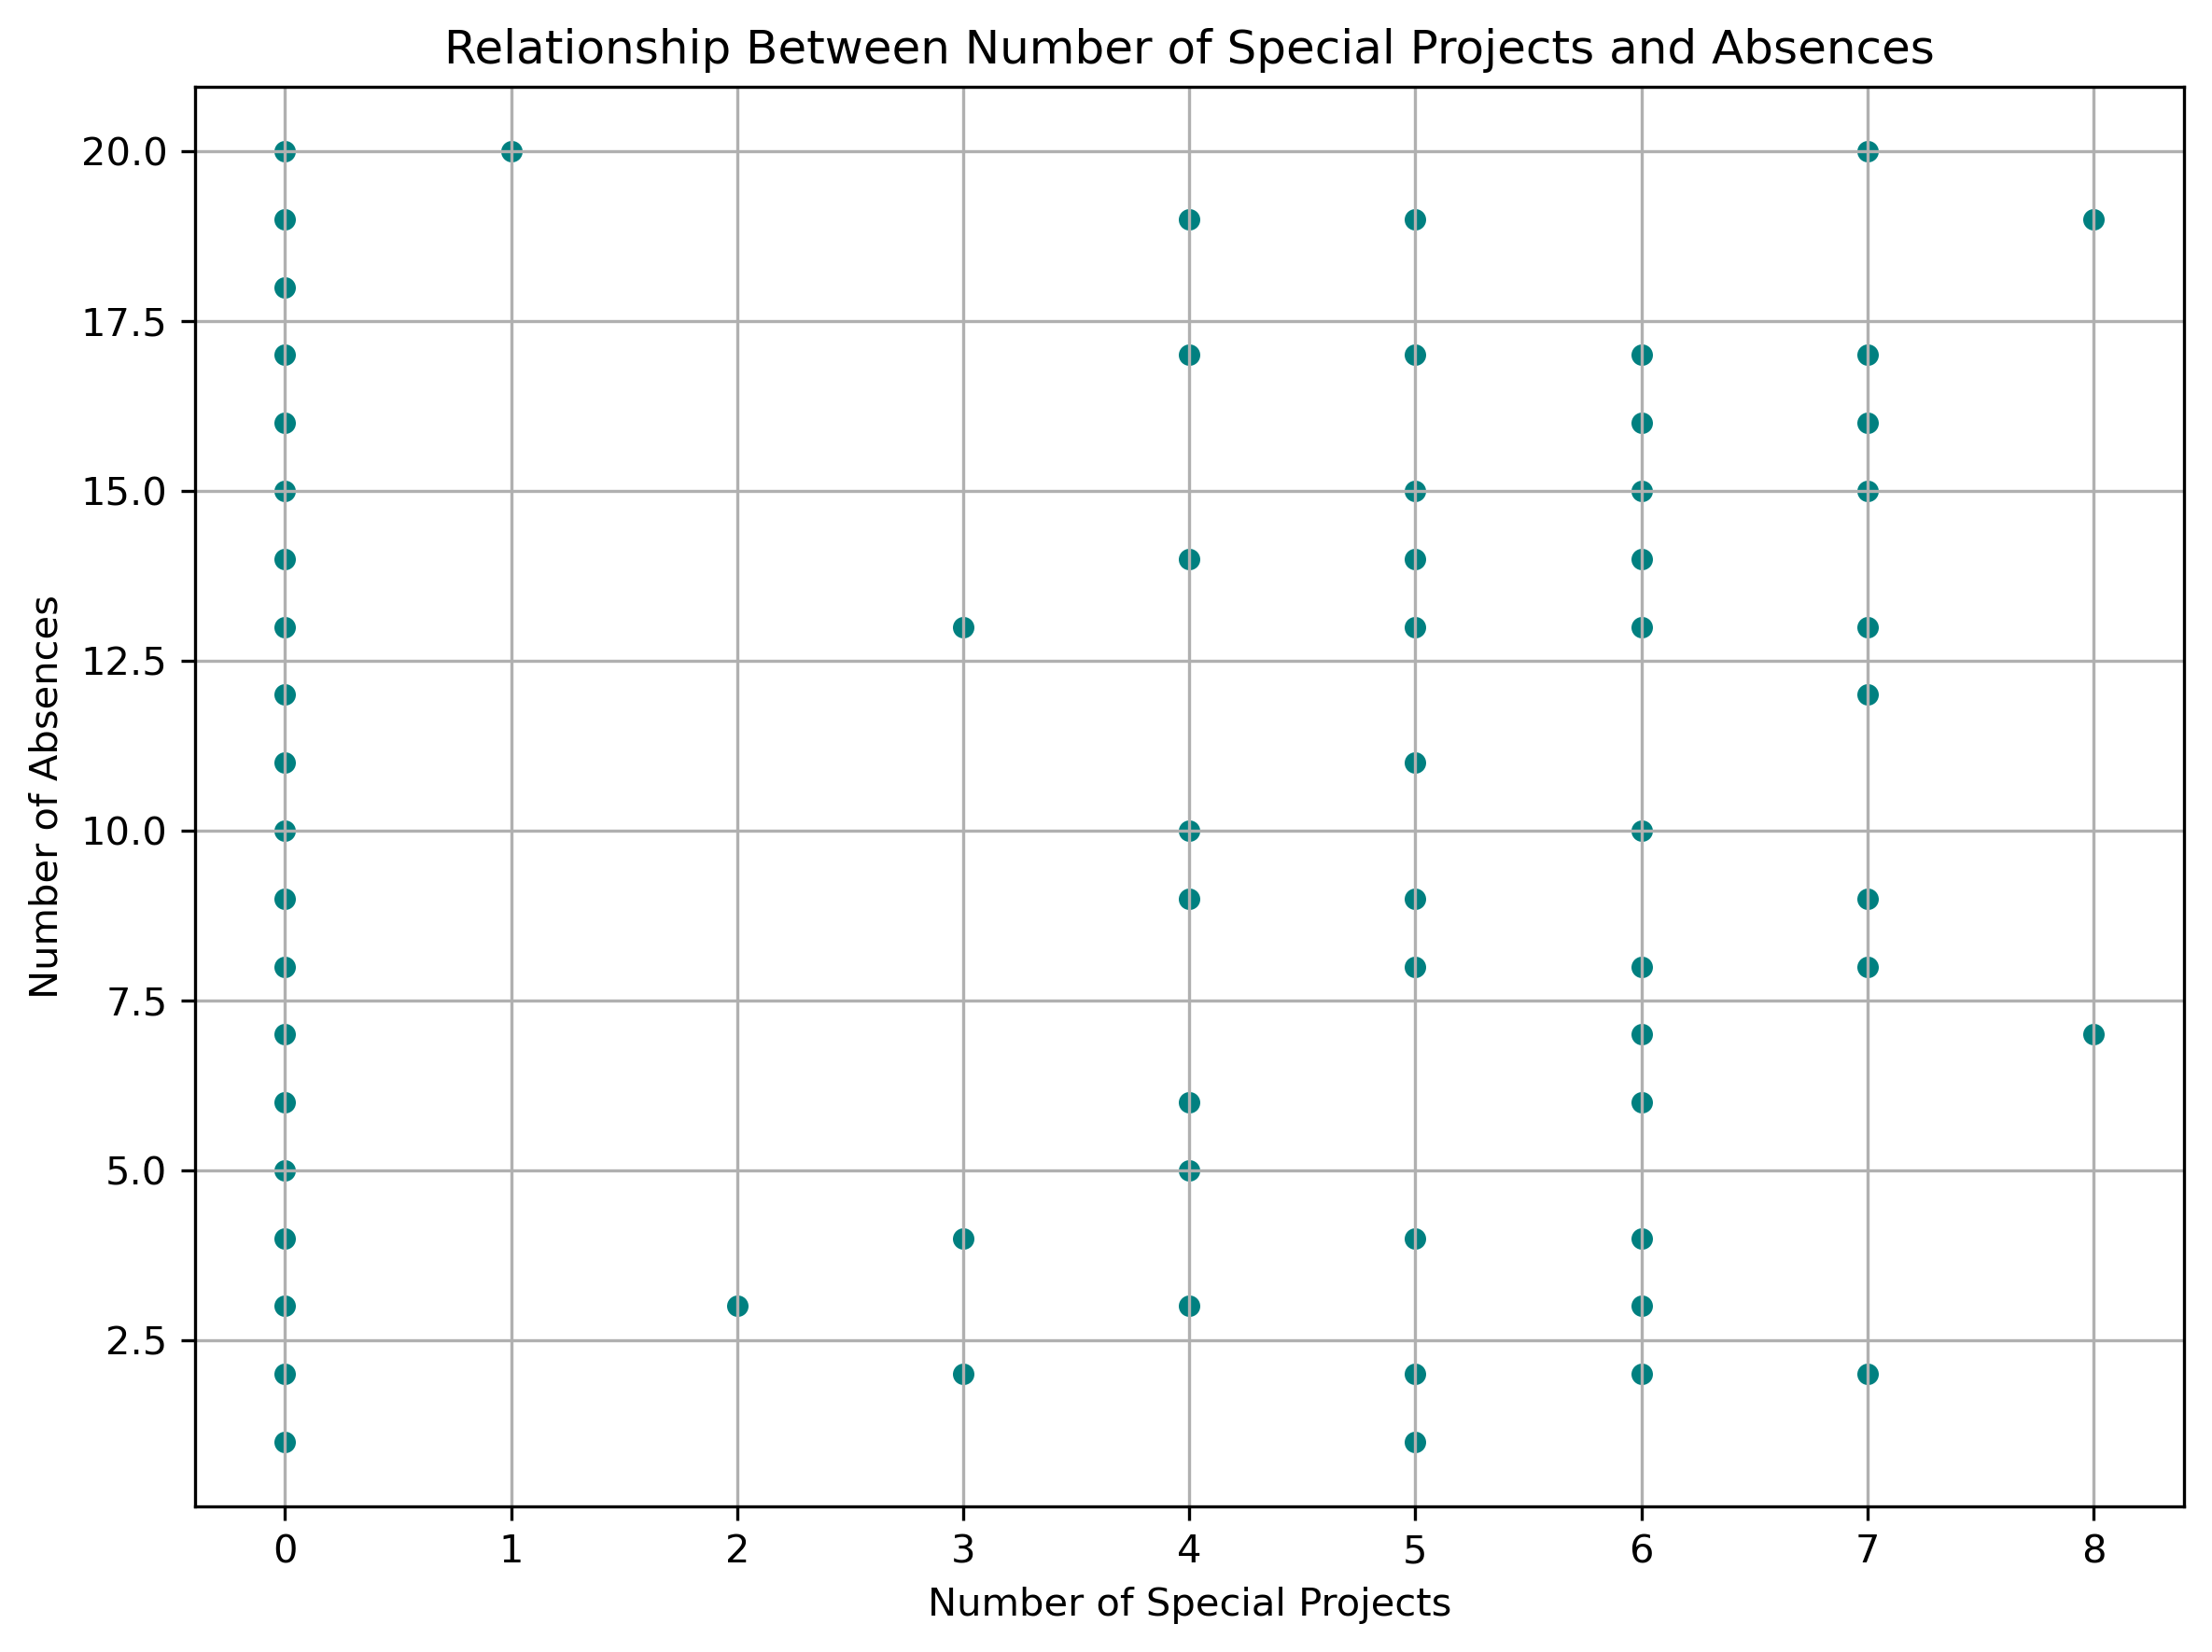

correlation: -0.02


In [57]:
plt.figure(figsize=(8, 6), dpi=300)
sns.scatterplot(x='SpecialProjectsCount', y='Absences', data=df, color='teal')
plt.title('Relationship Between Number of Special Projects and Absences')
plt.xlabel('Number of Special Projects')
plt.ylabel('Number of Absences')
plt.grid(True)
plt.tight_layout()
plt.show()

# compute correlation
correlation = df['SpecialProjectsCount'].corr(df['Absences'])
print(f'correlation: {correlation:.2f}')

*This part investigates whether there is a relationship between the number of special projects an employee is involved in and their number of absences. Based on the scatter plot, there appears to be no strong linear relationship between these two variables. The Pearson correlation coefficient, calculated as approximately -0.02, supports this observation, indicating a very weak negative correlation. This means that as the number of special projects increases, the number of absences may slightly decrease, but the relationship is too weak to be considered significant. Therefore, we can conclude that there is no meaningful direct relationship between these two variables in the current dataset.*